In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import nas_api_key
from functools import reduce

In [20]:
# Set the base URL  api_key=fZZGHvCirnsxtCCmwm3W
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?"
queryURL = f"{url}appid={nas_api_key}"

print(queryURL)

# Define an empty list to fetch data 
#cpi_data = []

# Print to logger
#print("Beginning Data Retrieval    ")
#print("----------------------------")


https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?appid=fZZGHvCirnsxtCCmwm3W


In [21]:
# Set the base URL api_key=fZZGHvCirnsxtCCmwm3W&transform=rdiff
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?"
queryURLjson = f"{url}appid={nas_api_key}"

print(queryURLjson)

https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?appid=fZZGHvCirnsxtCCmwm3W


In [22]:
# import data files
facebookDataPath = "data/Facebook.csv"
amazonDataPath = "data/Amazon.csv"
appleDataPath = "data/Apple.csv"
netflixDataPath = "data/Netflix.csv"
googleDataPath = "data/Google.csv"

# read and display the data
facebook_csv = pd.read_csv(facebookDataPath)
amazon_csv = pd.read_csv(amazonDataPath)
apple_csv = pd.read_csv(appleDataPath)
netflix_csv = pd.read_csv(netflixDataPath)
google_csv = pd.read_csv(googleDataPath)

In [23]:
# add a label column to each stock's dataset
facebook_csv.insert(0, "Label", "Facebook")
amazon_csv.insert(0, "Label", "Amazon")
apple_csv.insert(0, "Label", "Apple")
netflix_csv.insert(0, "Label", "Netlfix")
google_csv.insert(0, "Label", "Google")

In [24]:
# locate data only for 2022 -- rows 45 thru 295
fb = facebook_csv.iloc[44:294, :]
am = amazon_csv.iloc[44:294, :]
ap = apple_csv.iloc[44:294, :]
nf = netflix_csv.iloc[44:294, :]
gl = google_csv.iloc[44:294, :]

In [25]:
# merge the dataframes
merge1 = pd.merge(fb, am, how = "outer")
merge2 = pd.merge(merge1, ap, how = "outer")
merge3 = pd.merge(merge2, nf, how = "outer")
mergedData = pd.merge(merge3, gl, how = "outer")

# print mergedData to the output folder for troubleshooting purposes
mergedData.to_csv("output/printout.csv", index = False)

In [8]:
mergedData.head()

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38


In [27]:

# Define a function to create Linear Regression plots
# xAxis is independent variable
# yAxis is dependent variable
def linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
    regression = xAxis * slope + intercept
    linEQ = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(xAxis,yAxis)
    plt.plot(xAxis,regression,"r-")
    print(f"The r-value is {rvalue}")
    
    plt.annotate(linEQ,(x_lin_plot,y_lin_plot),fontsize=10,color="red")
    plt.xlabel('Date')
    plt.ylabel(f"{yLabel}")


In [28]:
# Create a DataFrame for each FAANG company
facebook_df = mergedData.loc[mergedData["Label"] == "Facebook", :]
facebook_df

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38
...,...,...,...,...,...,...,...
245,Facebook,1/7/22,$331.79,14722020,$332.74,$337.00,$328.88
246,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72
247,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84
248,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87


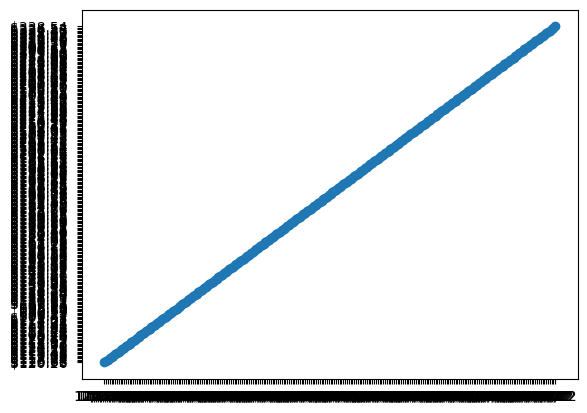

In [32]:
# Linear regression on Facebook
Close = facebook_df["Close/Last"]
Date = facebook_df["Date"]
yAxis = Close
xAxis = Date
plt.scatter(Date,Close)
# y_lin_plot = 100
# x_lin_plot = 0
# yLabel = "Meta Closing Stock Price ($)"
# linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
#plt.savefig(f"Fig.5.png")
plt.show()

In [54]:
# How do interest rate changes from the Federal Reserve affect stock prices during 2022?

TreasuryRatesDataPath = "data/TreasuryRates.csv"
TreasuryRates_csv = pd.read_csv(TreasuryRatesDataPath)
TreasuryRates_csv.insert(0, "Label", "Treasury Rates")
tr = TreasuryRates_csv.iloc[45:293, :]
fb = facebook_csv.iloc[45:295, :]

mergeIntRateFB = pd.merge(fb, tr, on = "Date", how = "outer")
mergeIntRateFB.head()

,Label_x,Date,Close/Last,Volume,Open,High,Low,Label_y,LT Composite > 10 Yrs,Treasury 20-Yr CMT,Extrapolation Factor
0,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51,Treasury Rates,0.009828,0.007317,NaN
1,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05,Treasury Rates,0.025189,0.027569,NaN
2,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54,Treasury Rates,0.023196,0.020460,NaN
3,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38,Treasury Rates,-0.005128,-0.005089,NaN
4,Facebook,12/21/22,$119.76,20392800,$116.70,$120.34,$115.62,Treasury Rates,0.000000,-0.002538,NaN


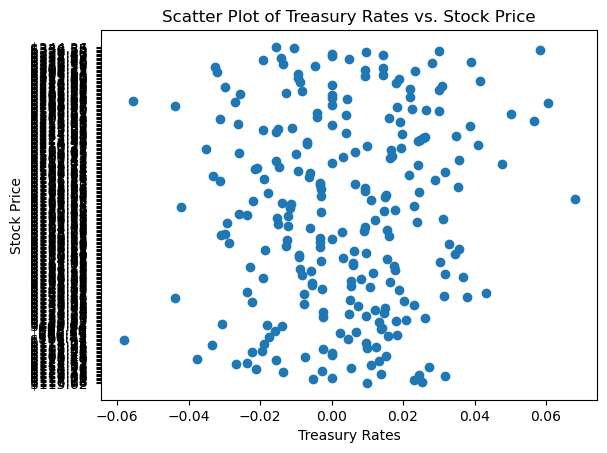

In [55]:
LastClose = mergeIntRateFB["Close/Last"]
IntRate = mergeIntRateFB["LT Composite > 10 Yrs"]


# Incorporate the other graph properties
plt.title("Scatter Plot of Treasury Rates vs. Stock Price")
plt.xlabel("Treasury Rates")
plt.ylabel("Stock Price")

plt.scatter(IntRate,LastClose)